<a href="https://www.kaggle.com/code/tiwariaman01/nyc-airbnb?scriptVersionId=182089580" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

> In this project i explore Airbnb dataset to find out to  what factors contribute most to listing's popularity and rating.

**To finding valueable insight's from this data set , i follow there steps**

1. Understanding data
2. Cleaning data
3. Exploratory data analysis
4. Presenting findings
5. Creating a Visualization
 

for create better understanding , i'll import python liberary for gathering, cleaning, analysing,and visualisation.


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_type = {
    'id' : 'int64',
    'NAME' : 'str',
    'host_id' : 'int64',
    'host_identity_verified' : 'str',
    'host name' : 'str',
    'neighbourhood group' : 'str',
    'neighbourhood' : 'str',
    'lat' : 'float64',
    'long' : 'float64',
    'country' : 'str',
    'country code' : 'str',
    'instant_bookable' : 'str',
    'cancellation_policy' : 'str',
    'room type' : 'str',
    'Construction year' : 'float64',
    'price' : 'str',
    'service fee' : 'str',
    'minimum nights' : 'float64',
    'number of reviews' : 'float64',
    'last review' : 'str',
    'reviews per month' : 'float64',
    'review rate number' : 'float64',
    'calculated host listings count' : 'float64',
    'availability 365' : 'float64',
    'house rules' : 'str',
    'license' : 'str'
}


> import the dataset

In [3]:
df = pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv',dtype=data_type)

Before starting cleaning process , i'll pay attention on dataset and their columns . so that, i can remove ,unrelevent columns, handle with missing values, delete duplicate value  and change datatypes and deals with messy data.

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# Cleaning data

**purpose of data cleaning ---**

* deals with missing value
* delete duplicate value
* handling of data tpye's
* correct type error or missepling
* remove outlier's
* handle data structure related to messy data
* deals with Contradictory Values 
* format errors in dataset
* delete unecessary columns .

# 1. Completeness Issues:
* Missing Values: Handle missing values in each column. For example, ‘licence’ and ‘house rules’ have a significant number of missing values.
* Duplicate Values: Remove the 541 duplicate values available in the data.
* Empty Rows: Delete the ‘licence’ column as it has 99.9% missing values.
# 2. Validation Issues:
*  Incorrect Data Types: Change the data type of ‘price’ and ‘service fees’ from object to int. Also, change ‘host_verification’ and ‘instant_bookable’ to bool, and ‘construction year’ from float to int.
* Format Errors: In ‘price’ and ‘service fee’ columns, remove the leading “$” and thousands separator “,”, then convert them to int type.
* Domain Violations: The ‘minimum nights’ column has negative values which are invalid. These need to be made absolute and converted to int type.
# 3. Accuracy Issues:
* Typographical Errors: There are some case-sensitive problems in the ‘neighbourhood group’ column, particularly with ‘Brooklyn’ and ‘Manhattan’.
* Outliers: The number_of_reviews and avg_reviews_per_month columns contain quite a few outliers
* Measurement Errors:
# 4. Consistency Issues:
* Unnecessary Columns: Determine which columns are not important to the analysis process and delete them. For example, ‘house rule’, ‘country code’, ‘country name’, ‘host name’, ‘last review’, and ‘calculated host listings count’ seem to be unnecessary.
* Rename Columns: Rename the rest of the columns as needed.


# Airbnb Data Cleaning Report


1. Dropping Unnecessary and Irrelevant Columns
Unnecessary and irrelevant columns were dropped from the data to streamline the dataset for analysis. Specifically, the license column was dropped because 99.9% of its rows were empty.

   List of Irrelevant Columns
   The following columns were identified as irrelevant and were dropped from the dataset:
   host name,
country,
country code,
house_rules,
calculated host listings count,
last review,

2. Dropping NaN Columns
Certain columns contained NaN values that could not be filled or replaced. These columns were dropped to maintain the integrity of the dataset.

3. Host Verification
The host_verification column contained NaN values. These were replaced with ‘unconfirmed’ as there was no verification confirmation for these entries.

4. Minimum Nights
The min_nights column had missing values. These were replaced with 1.0, as 1 refers to the lowest possible value for this column and is also the most frequently occurring number in the column.

5. Number of Reviews
The number_of_reviews column had NaN values. These were imputed with 0. This decision was made because the value couldn’t be replaced with the mean or median. Also, null values were available where the number of reviews was equal to 0.

6. Average Reviews per Month
There were 15% missing values in the avg_reviews_per_month column. A value of 0 was imputed where the star_rating and number_of_reviews values were 0.

7. Format Corrections and Data Type Conversions

* The $ sign and comma were removed from the price and service_fee columns.
* Negative signs were replaced from the min_nights column. These values were made absolute and converted to int type.
* The price, service_fee, and number_of_reviews columns were ensured to start greater than 0.
* The min_nights value was ensured to be in the range of 0 to 366.
* The star_rating range was ensured to be between 1 to 5.
* The yearly_availability was ensured to be between 1 to 366.
* The avg_reviews_per_month was ensured to exist between 1 to 31.

8. Outlier Analysis
* The price and service_fee columns were found to contain no outliers.
* The number_of_reviews and avg_reviews_per_month columns contain quite a few outliers. However, due to the nature of *  these variables, it’s possible for them to have such a broad range. Therefore, rows with these outliers were kept.
* The min_nights column also contains many outliers. But considering the data context, these values can have high variability. Therefore, these outliers were also kept.

In [5]:
# the best way of cleaning dataset is make copy of data , so that origenal data colud  be in their initial stage.


airbnb = df.copy() # make copy of origenal data and wil performe my cleanning process on copy dataset.
airbnb.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
airbnb.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [7]:
airbnb.shape 

(102599, 26)

In [8]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [9]:
airbnb.isnull().sum()/len(airbnb)*100

id                                 0.000000
NAME                               0.243667
host id                            0.000000
host_identity_verified             0.281679
host name                          0.395715
neighbourhood group                0.028265
neighbourhood                      0.015595
lat                                0.007797
long                               0.007797
country                            0.518524
country code                       0.127682
instant_bookable                   0.102340
cancellation_policy                0.074075
room type                          0.000000
Construction year                  0.208579
price                              0.240743
service fee                        0.266084
minimum nights                     0.398639
number of reviews                  0.178364
last review                       15.490404
reviews per month                 15.476759
review rate number                 0.317742
calculated host listings count  

In [10]:
# missing value
airbnb.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [11]:
#  total duplicate value 
df.duplicated().sum()

541

In [12]:
# handaning completness Issue 

# droping unecessary and unrelavent columns from data 

airbnb = airbnb.drop(columns=['host name', 'country','country code','house_rules',
                              'calculated host listings count','last review'])
# droping 'license'column because 99.9% rows are empty

airbnb =  airbnb.drop(columns=['license'])


# rename columns name for better understanding 
columns = {'id' : 'id',
           'NAME' : 'listing_name', 
           'host id':'host_id',
           'host_identity_verified':'host_verification',
           'neighbourhood group' :'neighbourhood_group', 
           'neighbourhood':'neighbourhood', 
           'lat':'latitude', 
           'long':'longitude',
           'instant_bookable':'instant_bookable',
           'cancellation_policy':'cancellation_policy',
           'room type':'room_type',
           'Construction year':'construction_year',
           'price':'price',
           'service fee':'service_fee', 
           'minimum nights':'min_nights',
           'number of reviews':'number_of_reviews',
           'reviews per month':'avg_reviews_per_month', 
           'review rate number':'star_rating',
           'availability 365':'yearly_availability'}

airbnb.rename(columns,axis=1,inplace=True)


# there are some columns those NaN value's can not be fill  or replace therefore, i am droping those columns NaN value

airbnb = airbnb.dropna(subset = ['listing_name', 'neighbourhood_group', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 
                                 'construction_year', 'price', 'service_fee', 'yearly_availability'])

# Replacing host_verification NaN values with unconfirmed because there is no varifivcation confirmation of nan values .

airbnb['host_verification'] = airbnb['host_verification'].fillna('unconfirmed')


#  Replacig min_nights missing values with 1.0 . beacuse 1 is refer to lowest possible value with respact of columns . as well as 1 is most frequently comming numbers in column . 

airbnb['min_nights'] = airbnb['min_nights'].fillna(1.0)

# in number_of_reviews column ,i'll impute NaN value with 0 because value can't be replace with mean and median 
airbnb['number_of_reviews'] = airbnb['number_of_reviews'].fillna(0.0)

#in number_of_reviews column ,i'll impute NaN value with 0 because null value is availble on there ,where number_of_rewiews is equal to 0 
airbnb['star_rating'] = airbnb['star_rating'].fillna(0.0)



# there is 15 of missing value in avg_reviews_per_month.i'll impute 0 where star_rating and number_of_reviews value would be 0.
airbnb = airbnb[~(airbnb['avg_reviews_per_month'].isnull() & airbnb['number_of_reviews'] > 0)]
airbnb['avg_reviews_per_month'] = airbnb[(airbnb['avg_reviews_per_month'].isnull() & airbnb['number_of_reviews']==0) ]['avg_reviews_per_month'].fillna(0)

airbnb = airbnb.dropna()


In [13]:
airbnb.isnull().sum()

id                       0
listing_name             0
host_id                  0
host_verification        0
neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
instant_bookable         0
cancellation_policy      0
room_type                0
construction_year        0
price                    0
service_fee              0
min_nights               0
number_of_reviews        0
avg_reviews_per_month    0
star_rating              0
yearly_availability      0
dtype: int64

In [14]:
airbnb.shape

(101132, 19)

In [15]:
# resolving validatation issue and fillter out

# Format Errors: removing $ sign and comma sign from price and service_fee columns

airbnb['price'] = airbnb['price'].str.replace('$','')
airbnb['price'] = airbnb['price'].str.replace(',','')


airbnb['service_fee'] = airbnb['service_fee'].str.replace('$','')
airbnb['service_fee'] = airbnb['service_fee'].str.replace(',','')

# a
airbnb['neighbourhood_group'] = airbnb['neighbourhood_group'].str.replace('brookln','Brooklyn')

# Domain Violations: 
#repalcing  negitive sigh from‘minimum nights’ column . and These need to be made absolute and converted to int type
airbnb['min_nights'] = airbnb['min_nights'].abs()


# change data types of columns 

airbnb[['min_nights','price','service_fee','yearly_availability','construction_year']] = airbnb[
    ['min_nights','price','service_fee','yearly_availability','construction_year']].astype(int)



airbnb['instant_bookable'] = airbnb['instant_bookable'].map({'TRUE': True, 'FALSE': False}).astype(bool)
airbnb['host_verification'] = airbnb['host_verification'].map({'verified': True, 'unconfirmed': False}).astype(bool)




# dealing with inconsistence data values.

airbnb = airbnb [(airbnb ['latitude'].between(-90,90) & airbnb ['longitude'].between(-180,180))]



airbnb = airbnb[airbnb['min_nights']>0]
airbnb = airbnb[airbnb['service_fee']>0]
airbnb = airbnb[airbnb['price']>0]

airbnb = airbnb[airbnb['number_of_reviews']>0]


airbnb = airbnb[(airbnb['min_nights'] > 0 ) & (airbnb['min_nights']<= 366)]


airbnb = airbnb[(airbnb['star_rating'] >= 0) & (airbnb['star_rating'] <= 5)]


airbnb = airbnb[(airbnb['yearly_availability'] >= 0) & (airbnb['yearly_availability'] <= 366)]


airbnb = airbnb[(airbnb['avg_reviews_per_month'] >=0) & (airbnb['avg_reviews_per_month'] <= 31)]





    


In [16]:
# detacting outlier's
   
for column in airbnb[['price', 'service_fee', 'number_of_reviews', 'avg_reviews_per_month', 'min_nights']]:

    Q1 = airbnb[column].quantile(0.25)
    Q3 = airbnb[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = airbnb[(airbnb[column] < lower_bound) | (airbnb[column] > upper_bound)]

    print(column)
    print(outliers.shape[0])

    
     

price
0
service_fee
0
number_of_reviews
8225
avg_reviews_per_month
3794
min_nights
13567


#  EDA 

In [17]:
airbnb.head()

,id,listing_name,host_id,host_verification,neighbourhood_group,neighbourhood,latitude,longitude,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,min_nights,number_of_reviews,avg_reviews_per_month,star_rating,yearly_availability
0,1001254,Clean & quiet apt home by the park,80014485718,False,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020,966,193,10,9.0,0.21,4.0,286
1,1002102,Skylit Midtown Castle,52335172823,True,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007,142,28,30,45.0,0.38,4.0,228
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,True,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009,204,41,10,9.0,0.10,3.0,289
6,1004650,BlissArtsSpace!,61300605564,False,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,moderate,Private room,2015,71,14,45,49.0,0.40,5.0,224
7,1005202,BlissArtsSpace!,90821839709,False,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,moderate,Private room,2009,1060,212,45,49.0,0.40,5.0,219


<Axes: xlabel='neighbourhood_group'>

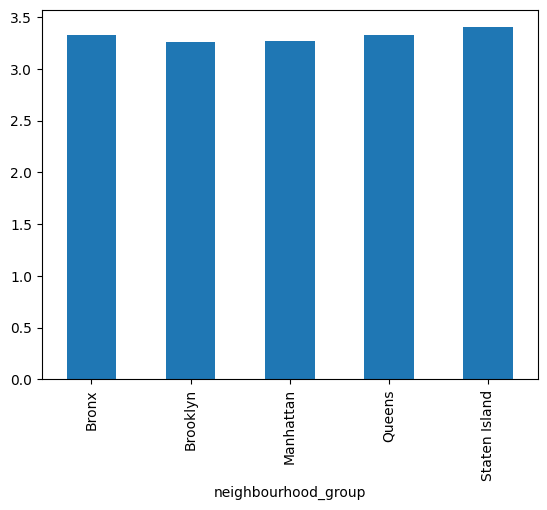

In [18]:
# avgerage rating of neighbourhood_group
airbnb.groupby('neighbourhood_group')['star_rating'].mean().plot(kind='bar')

<Axes: xlabel='host_verification'>

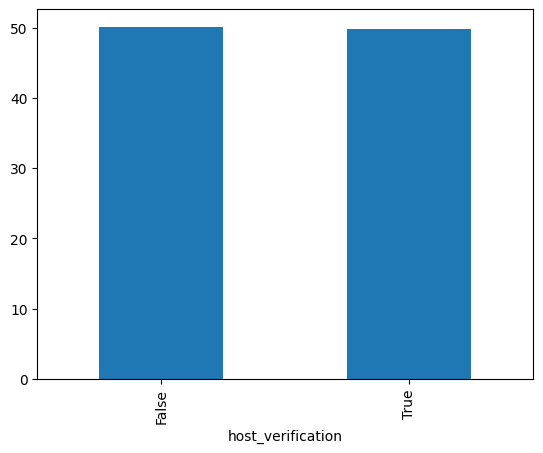

In [19]:
(airbnb.groupby('host_verification').size()/len(airbnb)*100).plot(kind='bar')

In [20]:
airbnb.groupby('instant_bookable').size()/len(airbnb)*100

instant_bookable
False    50.243286
True     49.756714
dtype: float64

<Axes: >

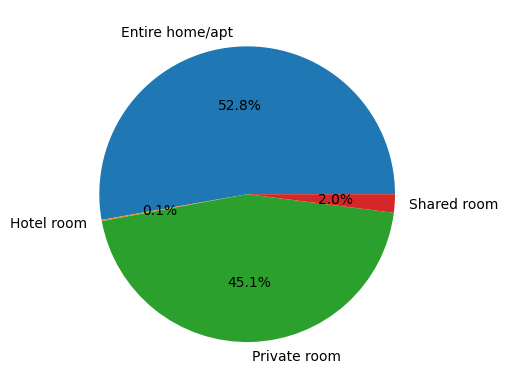

In [21]:
(airbnb.groupby('room_type').size()/len(airbnb)*100.).plot(kind='pie',autopct='%1.1f%%'  )

<Axes: xlabel='room_type'>

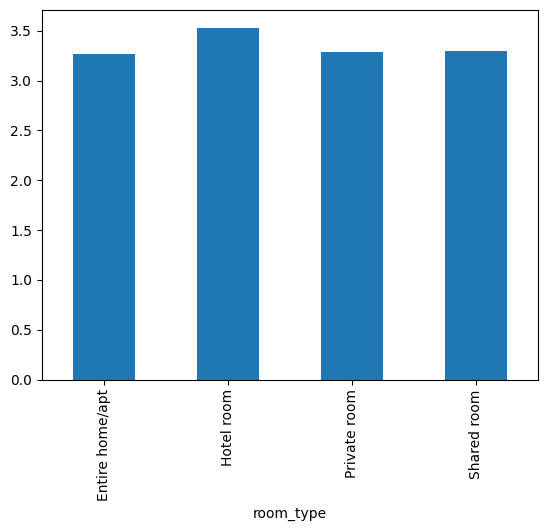

In [22]:
airbnb.groupby('room_type')['star_rating'].mean().plot(kind='bar')

In [23]:
airbnb.groupby('room_type')['min_nights'].agg(['min','max','mean'])

,min,max,mean
room_type,,,
Entire home/apt,1,365,8.709878
Hotel room,1,30,4.159292
Private room,1,366,5.570524
Shared room,1,100,5.414517


In [24]:
airbnb.groupby('room_type')['number_of_reviews'].agg(['min','max','mean'])

,min,max,mean
room_type,,,
Entire home/apt,1.0,698.0,31.481984
Hotel room,1.0,884.0,76.584071
Private room,1.0,776.0,32.445774
Shared room,1.0,480.0,26.394721


In [25]:
airbnb.groupby('room_type')['price'].agg(['min','max','mean'])

,min,max,mean
room_type,,,
Entire home/apt,50,1200,625.229765
Hotel room,50,1193,659.725664
Private room,50,1200,627.570791
Shared room,50,1199,631.626275


In [26]:
airbnb.groupby('room_type')['service_fee'].agg(['min','max','mean'])

,min,max,mean
room_type,,,
Entire home/apt,10,240,125.047692
Hotel room,10,239,131.955752
Private room,10,240,125.513533
Shared room,10,240,126.329934


In [27]:
pd.pivot_table(data=airbnb,index='construction_year',values='price',aggfunc='sum',)

,price
construction_year,
2003,2581138
2004,2588629
2005,2598527
2006,2692511
2007,2591004
2008,2731226
2009,2592718
2010,2582200
2011,2609067


In [28]:
pd.pivot_table(data=airbnb,index='room_type',values='id',aggfunc='count',columns='cancellation_policy')

cancellation_policy,flexible,moderate,strict
room_type,,,
Entire home/apt,14667,14627,14529
Hotel room,43,36,34
Private room,12344,12547,12536
Shared room,568,556,543


In [29]:
pd.pivot_table(data=airbnb,index='room_type',values='id',aggfunc='count',columns='instant_bookable')

instant_bookable,False,True
room_type,,
Entire home/apt,21996,21827
Hotel room,51,62
Private room,18855,18572
Shared room,815,852


                          price  min_nights  number_of_reviews  service_fee  \
price                  1.000000   -0.003953           0.006133     0.999991   
min_nights            -0.003953    1.000000          -0.079184    -0.003948   
number_of_reviews      0.006133   -0.079184           1.000000     0.006096   
service_fee            0.999991   -0.003948           0.006096     1.000000   
avg_reviews_per_month  0.005540   -0.183325           0.596456     0.005508   
star_rating           -0.007098    0.000997          -0.023659    -0.007100   
yearly_availability    0.000492    0.089663           0.105384     0.000504   

                       avg_reviews_per_month  star_rating  yearly_availability  
price                               0.005540    -0.007098             0.000492  
min_nights                         -0.183325     0.000997             0.089663  
number_of_reviews                   0.596456    -0.023659             0.105384  
service_fee                         0.00550

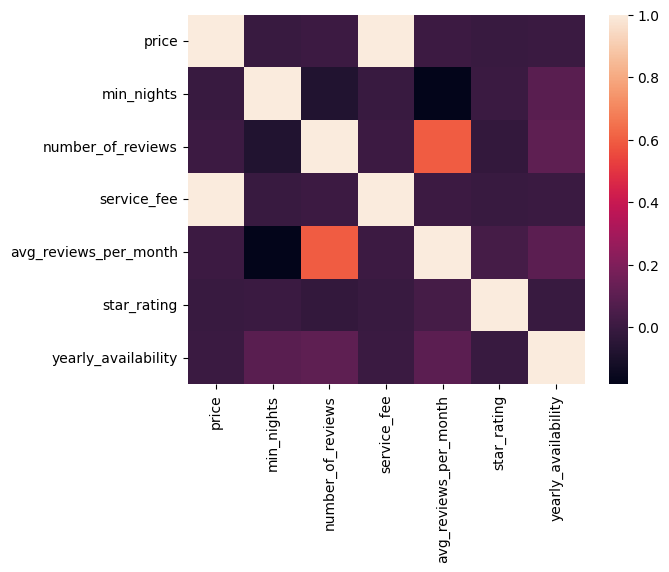

In [30]:
import seaborn as sns


x = airbnb[['price','min_nights',
       'number_of_reviews', 'service_fee', 'avg_reviews_per_month', 'star_rating',
       'yearly_availability']]

sns.heatmap(data= x.corr())
print(x.corr())

In [31]:
airbnb.columns

Index(['id', 'listing_name', 'host_id', 'host_verification',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'min_nights',
       'number_of_reviews', 'avg_reviews_per_month', 'star_rating',
       'yearly_availability'],
      dtype='object')